In [1]:
# Credits: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [0]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Using Prettytable for displaying the observations
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Embedding Len", "Architechture", "Accuracy", "Loss"]
print(table)

+---------------+---------------+----------+------+
| Embedding Len | Architechture | Accuracy | Loss |
+---------------+---------------+----------+------+
+---------------+---------------+----------+------+


In [0]:
# 1. Please remove the imdb code as it causes confusion. 
# 2. Plot the loss and accuracies for both train and test data. 
# 3. Make sure none of your models overfit. 
# 4. Add a pretty table in the end comparing all the models. 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sqlite3
import os, re
from tqdm import tqdm
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
dir_path='/content/drive/My Drive/Colab Notebooks/AppliedAI/'

In [0]:
# Subsequent code copied from previous assignments

con = sqlite3.connect(dir_path+'database.sqlite')
filtered_data = pd.read_sql_query(
          "SELECT * FROM Reviews WHERE Score < 3 LIMIT 50000", con)

filtered_data = filtered_data.append(pd.read_sql_query(
        "SELECT * FROM Reviews WHERE Score > 3 LIMIT 50000", con))
filtered_data.reset_index(drop=True, inplace=True)

In [0]:
# changing reviews with score less than 3 to be positive and vice-versa
filtered_data['Score']=filtered_data['Score'].apply(lambda x : 0 if x<3 else 1)

In [0]:
#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True,
                        inplace=False,kind='quicksort',na_position='last')

In [10]:
#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName",
                      "Time","Text"},keep='first', inplace=False)
final.shape

(83317, 10)

In [0]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [12]:
print(final.shape)
#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

(83315, 10)


1    45420
0    37895
Name: Score, dtype: int64

In [0]:
def decontracted(phrase):
  # specific
  phrase = re.sub(r"won't", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)
  # general
  phrase = re.sub(r"n\'t", " not", phrase)
  phrase = re.sub(r"\'re", " are", phrase)
  phrase = re.sub(r"\'s", " is", phrase)
  phrase = re.sub(r"\'d", " would", phrase)
  phrase = re.sub(r"\'ll", " will", phrase)
  phrase = re.sub(r"\'t", " not", phrase)
  phrase = re.sub(r"\'ve", " have", phrase)
  phrase = re.sub(r"\'m", " am", phrase)
  return phrase

In [0]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours',\
                'ourselves', 'you', "you're", "you've",\
"you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him',\
                'his', 'himself', \
'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', \
                'they', 'them', 'their',\
'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',\
                "that'll", 'these', 'those', \
'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has',\
                'had', 'having', 'do', 'does', \
'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', \
                'as', 'until', 'while', 'of', \
'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',\
                'during', 'before', 'after',\
'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',\
                'over', 'under', 'again', 'further',\
'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all',\
                'any', 'both', 'each', 'few', 'more',\
'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than',\
                'too', 'very', \
's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've",\
                'now', 'd', 'll', 'm', 'o', 're', \
've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',\
                "didn't", 'doesn', "doesn't", 'hadn',\
"hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",\
                'ma', 'mightn', "mightn't", 'mustn',\
"mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',\
                "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
'won', "won't", 'wouldn', "wouldn't"])

In [15]:
preprocessed_reviews = []
review_score = []
# tqdm is for printing the status bar
for sentence, score in tqdm(final[['Text', 'Score']].values):
  sentence = re.sub(r"http\S+", "", sentence)
  sentence = BeautifulSoup(sentence, 'lxml').get_text()
  sentence = decontracted(sentence)
  sentence = re.sub("\S*\d\S*", "", sentence).strip()
  sentence = re.sub('[^A-Za-z]+', ' ', sentence)
  # https://gist.github.com/sebleier/554280
  sentence = ' '.join(e.lower() for e in sentence.split() \
                            if e.lower() not in stopwords)
  preprocessed_reviews.append(sentence.strip())
  review_score.append(score)

100%|██████████| 83315/83315 [00:33<00:00, 2491.64it/s]


In [16]:
## Similartly you can do preprocessing for review summary also.
# Combining all the above stundents
preprocessed_summary = []
for summary in tqdm(final['Summary'].values):
  summary = re.sub(r"http\S+", "", summary)
  summary = BeautifulSoup(summary, 'lxml').get_text()
  summary = decontracted(summary)
  summary = re.sub("\S*\d\S*", "", summary).strip()
  summary = re.sub('[^A-Za-z0-9]+', ' ', summary)
  # adding 0-9 in the regex
  summary = ' '.join(e.lower() for e in summary.split()\
                          if e.lower() not in stopwords)
  preprocessed_summary.append(summary.strip())

100%|██████████| 83315/83315 [00:20<00:00, 4020.21it/s]


In [17]:
preprocessed_text = [str(rev+' '+summ) for rev, summ in \
zip(preprocessed_reviews, preprocessed_summary)]
print(preprocessed_text[:5])

['one best children books ever written mini version book not portrayed one priced product sent email regarding bewilderment amazon got no response awesome book poor size', 'give five stars maurice sendak story one star printed edition book children older copy book familiar previous softcover version ordered granddaughters embarrassed give gift looks puny book size postcard think overpriced learned lesson not buying softcover children books next time get used copy story great softcover book disappointing', 'dogs loves chicken product china wont buying anymore hard find chicken products made usa one isnt bad good product wont take chances till know going china imports made china', 'dogs love saw pet store tag attached regarding made china satisfied safe dog lover delites', 'received containers previously opened seals opened top containers decent pieces liver grisley pieces lot powder bottom never buy liver treats amazon big rip review freeze dried liver treats dogs']


In [0]:
# PLot the length of the text 
text_lens = [len(text.split()) for text in preprocessed_text]

In [19]:
max(text_lens)

952

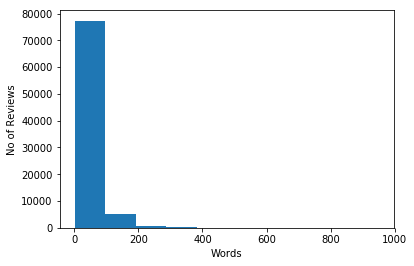

In [20]:
plt.hist(text_lens, bins=10)
plt.ylabel('No of Reviews')
plt.xlabel('Words')
plt.show()

In [0]:
# Although the maximum value of length of text is 952, but we can fix that to 
# 400 as that would cover almost whole of the data (as seen from plot)

In [0]:
# this is random splitting into train, test and cross validation set
X_train, X_test, y_train, y_test = train_test_split(preprocessed_text,
                              review_score,test_size=0.30, random_state = 0,
                              stratify = review_score)

In [0]:
X_cv, X_test, y_cv, y_test = train_test_split(X_test,y_test,
                              test_size=0.50, random_state = 0,
                              stratify = y_test)

In [0]:
### Create Tokenizer
vocabulary_size = 5000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(X_train)

In [0]:
# Convert text to int sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_cv = tokenizer.texts_to_sequences(X_cv)

In [0]:
# truncate and/or pad input sequences
max_review_length = 400
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
X_cv = sequence.pad_sequences(X_cv, maxlen=max_review_length)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(X_cv.shape)

(58320, 400)
(12498, 400)
(12497, 400)


In [28]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(vocabulary_size+1, embedding_vecor_length, 
                    input_length=max_review_length))
model.add(LSTM(50))
# , activation='tanh', use_bias=True, 
#                kernel_initializer='glorot_uniform'
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 32)           160032    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 176,683
Trainable params: 176,683
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
# https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
history = model.fit(X_train, y_train, validation_data=(X_cv, y_cv), 
                        nb_epoch=10, batch_size=128, verbose =2)




Train on 58320 samples, validate on 12497 samples
Epoch 1/10





 - 243s - loss: 0.2863 - acc: 0.8756 - val_loss: 0.2030 - val_acc: 0.9185
Epoch 2/10
 - 240s - loss: 0.1823 - acc: 0.9307 - val_loss: 0.1933 - val_acc: 0.9225
Epoch 3/10
 - 242s - loss: 0.1640 - acc: 0.9370 - val_loss: 0.1975 - val_acc: 0.9241
Epoch 4/10
 - 242s - loss: 0.1456 - acc: 0.9461 - val_loss: 0.1981 - val_acc: 0.9229
Epoch 5/10
 - 240s - loss: 0.1269 - acc: 0.9526 - val_loss: 0.2144 - val_acc: 0.9236
Epoch 6/10
 - 242s - loss: 0.1135 - acc: 0.9586 - val_loss: 0.2275 - val_acc: 0.9184
Epoch 7/10
 - 236s - loss: 0.0992 - acc: 0.9642 - val_loss: 0.2229 - val_acc: 0.9187
Epoch 8/10
 - 236s - loss: 0.0891 - acc: 0.9683 - val_loss: 0.2501 - val_acc: 0.9193
Epoch 9/10
 - 236s - loss: 0.0783 - acc: 0.9735 - val_loss: 0.2831 - val_acc: 0.9173
Epoch 10/10
 - 236s - loss: 0.0696 - acc: 0.9771 - val_loss: 0.2706 - val_acc: 0.9166


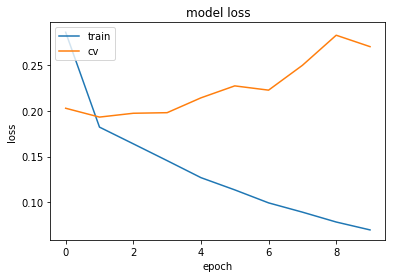

In [30]:
# This is for plotting the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()

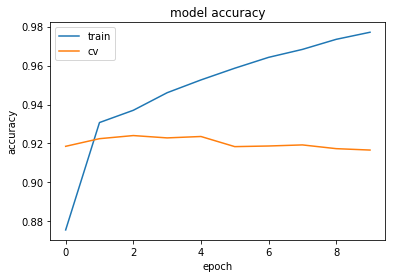

In [31]:
# This is for plotting the model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()

In [32]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss : %.2f%%" % (scores[0]))

Accuracy: 91.41%
Loss : 0.27%


In [0]:
table.add_row([32, 'LSTM(50)-Dense', 'Train: 97%  Test:91%', 
               'Train: 0.06  Test: 0.27'])

In [0]:
# Model 2

In [35]:
# create the model
embedding_vecor_length = 64
model = Sequential()
model.add(Embedding(vocabulary_size+1, embedding_vecor_length, 
                    input_length=max_review_length))
model.add(LSTM(32, return_sequences=True, dropout=0.3))
model.add(LSTM(16, dropout=0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 400, 64)           320064    
_________________________________________________________________
lstm_2 (LSTM)                (None, 400, 32)           12416     
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 335,633
Trainable params: 335,633
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
history = model.fit(X_train, y_train, nb_epoch=10, batch_size=128,
                   validation_data=(X_cv, y_cv), verbose=2)

Train on 58320 samples, validate on 12497 samples
Epoch 1/10
 - 425s - loss: 0.3034 - acc: 0.8686 - val_loss: 0.2022 - val_acc: 0.9201
Epoch 2/10
 - 422s - loss: 0.1845 - acc: 0.9299 - val_loss: 0.1899 - val_acc: 0.9254
Epoch 3/10
 - 421s - loss: 0.1571 - acc: 0.9400 - val_loss: 0.1927 - val_acc: 0.9261
Epoch 4/10
 - 416s - loss: 0.1375 - acc: 0.9482 - val_loss: 0.2201 - val_acc: 0.9219
Epoch 5/10
 - 416s - loss: 0.1208 - acc: 0.9554 - val_loss: 0.2046 - val_acc: 0.9240
Epoch 6/10
 - 418s - loss: 0.1072 - acc: 0.9613 - val_loss: 0.2219 - val_acc: 0.9235
Epoch 7/10
 - 404s - loss: 0.0955 - acc: 0.9657 - val_loss: 0.2285 - val_acc: 0.9228
Epoch 8/10
 - 402s - loss: 0.0863 - acc: 0.9693 - val_loss: 0.2438 - val_acc: 0.9208
Epoch 9/10
 - 402s - loss: 0.0762 - acc: 0.9735 - val_loss: 0.2481 - val_acc: 0.9197
Epoch 10/10
 - 409s - loss: 0.0670 - acc: 0.9767 - val_loss: 0.2661 - val_acc: 0.9202


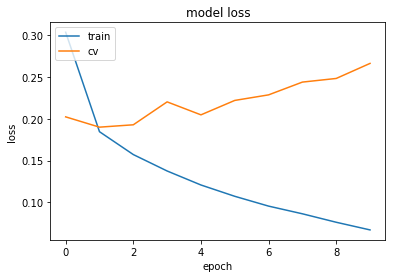

In [37]:
# This is for plotting the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()

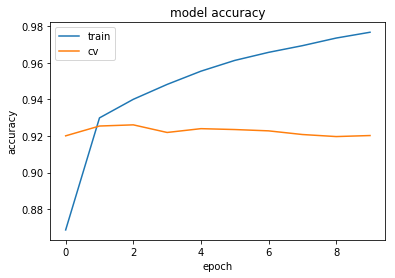

In [38]:
# This is for plotting the model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()

In [39]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss : %.2f%%" % (scores[0]))

Accuracy: 91.82%
Loss : 0.28%


In [0]:
table.add_row([64, 'LSTM(32)-LSTM(16)-Dense', 'Train: 97.6%  Test:91.8%', 
               'Train: 0.06  Test: 0.28'])

In [0]:
# Model 3

In [42]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(vocabulary_size+1, embedding_vecor_length, 
                    input_length=max_review_length))
model.add(LSTM(50, activation='tanh', use_bias=True, 
               kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 400, 32)           160032    
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 176,683
Trainable params: 176,683
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
history = model.fit(X_train, y_train, nb_epoch=10, batch_size=128,
                   validation_data=(X_cv, y_cv), verbose=2)

Train on 58320 samples, validate on 12497 samples
Epoch 1/10
 - 248s - loss: 0.3186 - acc: 0.8611 - val_loss: 0.2083 - val_acc: 0.9178
Epoch 2/10
 - 244s - loss: 0.1880 - acc: 0.9270 - val_loss: 0.1954 - val_acc: 0.9223
Epoch 3/10
 - 249s - loss: 0.1668 - acc: 0.9370 - val_loss: 0.1983 - val_acc: 0.9217
Epoch 4/10
 - 252s - loss: 0.1520 - acc: 0.9430 - val_loss: 0.1968 - val_acc: 0.9232
Epoch 5/10
 - 248s - loss: 0.1361 - acc: 0.9497 - val_loss: 0.2006 - val_acc: 0.9221
Epoch 6/10
 - 249s - loss: 0.1200 - acc: 0.9568 - val_loss: 0.2228 - val_acc: 0.9196
Epoch 7/10
 - 250s - loss: 0.1069 - acc: 0.9623 - val_loss: 0.2278 - val_acc: 0.9179
Epoch 8/10
 - 247s - loss: 0.0947 - acc: 0.9671 - val_loss: 0.2359 - val_acc: 0.9179
Epoch 9/10
 - 252s - loss: 0.0831 - acc: 0.9721 - val_loss: 0.2501 - val_acc: 0.9168
Epoch 10/10
 - 257s - loss: 0.0723 - acc: 0.9761 - val_loss: 0.2624 - val_acc: 0.9142


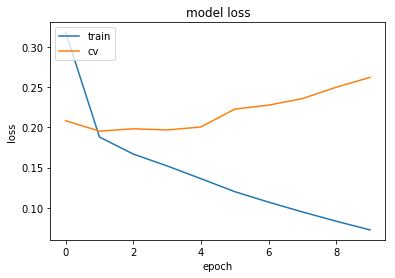

In [44]:
# This is for plotting the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()

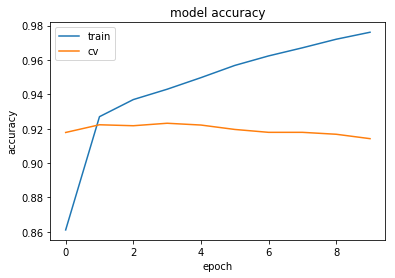

In [45]:
# This is for plotting the model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()

In [47]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss : %.2f%%" % (scores[0]))

Accuracy: 91.65%
Loss : 0.26%


In [0]:
table.add_row([32, 'LSTM(50)-Dense', 'Train: 97.6%  Test:91.6%', 
               'Train: 0.07  Test: 0.26'])

In [0]:
# Model 4

In [52]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(vocabulary_size+1, embedding_vecor_length, 
                    input_length=max_review_length))
model.add(LSTM(32, activation='tanh', use_bias=True, 
               kernel_initializer='glorot_uniform', dropout=0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 400, 32)           160032    
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 168,385
Trainable params: 168,385
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
history = model.fit(X_train, y_train, nb_epoch=10, batch_size=128,
                   validation_data=(X_cv, y_cv), verbose=2)

Train on 58320 samples, validate on 12497 samples
Epoch 1/10
 - 213s - loss: 0.3061 - acc: 0.8620 - val_loss: 0.2007 - val_acc: 0.9222
Epoch 2/10
 - 212s - loss: 0.1861 - acc: 0.9282 - val_loss: 0.1914 - val_acc: 0.9246
Epoch 3/10
 - 209s - loss: 0.1656 - acc: 0.9365 - val_loss: 0.1906 - val_acc: 0.9233
Epoch 4/10
 - 207s - loss: 0.1518 - acc: 0.9423 - val_loss: 0.1960 - val_acc: 0.9238
Epoch 5/10
 - 211s - loss: 0.1389 - acc: 0.9477 - val_loss: 0.2019 - val_acc: 0.9229
Epoch 6/10
 - 209s - loss: 0.1287 - acc: 0.9518 - val_loss: 0.2117 - val_acc: 0.9201
Epoch 7/10
 - 209s - loss: 0.1181 - acc: 0.9560 - val_loss: 0.2203 - val_acc: 0.9217
Epoch 8/10
 - 209s - loss: 0.1109 - acc: 0.9594 - val_loss: 0.2365 - val_acc: 0.9196
Epoch 9/10
 - 210s - loss: 0.1042 - acc: 0.9621 - val_loss: 0.2396 - val_acc: 0.9189
Epoch 10/10
 - 212s - loss: 0.0976 - acc: 0.9644 - val_loss: 0.2447 - val_acc: 0.9209


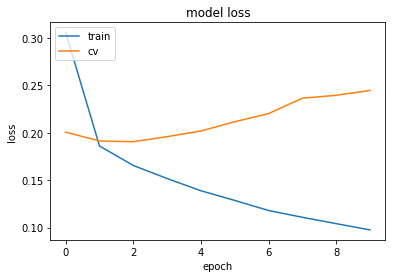

In [54]:
# This is for plotting the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()

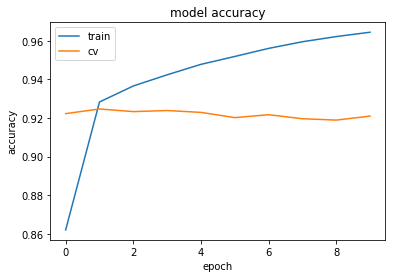

In [55]:
# This is for plotting the model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()

In [56]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss : %.2f%%" % (scores[0]))

Accuracy: 91.77%
Loss : 0.25%


In [0]:
table.add_row([32, 'LSTM(32)-Dense', 'Train: 96.4%  Test:91.7%', 
               'Train: 0.09  Test: 0.25'])

In [0]:
# Model 5

In [58]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(vocabulary_size+1, embedding_vecor_length, 
                    input_length=max_review_length))
model.add(LSTM(10, dropout=0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 400, 32)           160032    
_________________________________________________________________
lstm_6 (LSTM)                (None, 10)                1720      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 161,763
Trainable params: 161,763
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
history = model.fit(X_train, y_train, nb_epoch=10, batch_size=128,
                   validation_data=(X_cv, y_cv), verbose=2)

Train on 58320 samples, validate on 12497 samples
Epoch 1/10
 - 167s - loss: 0.3602 - acc: 0.8461 - val_loss: 0.2259 - val_acc: 0.9115
Epoch 2/10
 - 163s - loss: 0.2076 - acc: 0.9194 - val_loss: 0.2027 - val_acc: 0.9218
Epoch 3/10
 - 164s - loss: 0.1817 - acc: 0.9320 - val_loss: 0.1995 - val_acc: 0.9213
Epoch 4/10
 - 163s - loss: 0.1664 - acc: 0.9368 - val_loss: 0.1986 - val_acc: 0.9232
Epoch 5/10
 - 162s - loss: 0.1547 - acc: 0.9425 - val_loss: 0.1982 - val_acc: 0.9246
Epoch 6/10
 - 162s - loss: 0.1453 - acc: 0.9457 - val_loss: 0.2010 - val_acc: 0.9233
Epoch 7/10
 - 163s - loss: 0.1366 - acc: 0.9493 - val_loss: 0.2044 - val_acc: 0.9221
Epoch 8/10
 - 162s - loss: 0.1298 - acc: 0.9520 - val_loss: 0.2157 - val_acc: 0.9218
Epoch 9/10
 - 163s - loss: 0.1239 - acc: 0.9544 - val_loss: 0.2143 - val_acc: 0.9213
Epoch 10/10
 - 163s - loss: 0.1154 - acc: 0.9575 - val_loss: 0.2230 - val_acc: 0.9208


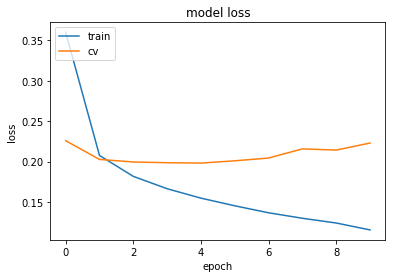

In [60]:
# This is for plotting the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()

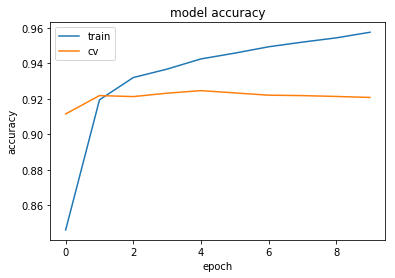

In [61]:
# This is for plotting the model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()

In [62]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss : %.2f%%" % (scores[0]))

Accuracy: 92.16%
Loss : 0.22%


In [0]:
table.add_row([32, 'LSTM(10)-Dense', 'Train: 95.7%  Test:92.1%', 
               'Train: 0.11  Test: 0.22'])

In [64]:
print(table)

+---------------+-------------------------+--------------------------+-------------------------+
| Embedding Len |      Architechture      |         Accuracy         |           Loss          |
+---------------+-------------------------+--------------------------+-------------------------+
|       32      |      LSTM(50)-Dense     |   Train: 97%  Test:91%   | Train: 0.06  Test: 0.27 |
|       64      | LSTM(32)-LSTM(16)-Dense | Train: 97.6%  Test:91.8% | Train: 0.06  Test: 0.28 |
|       32      |      LSTM(50)-Dense     | Train: 97.6%  Test:91.6% | Train: 0.07  Test: 0.26 |
|       32      |      LSTM(32)-Dense     | Train: 96.4%  Test:91.7% | Train: 0.09  Test: 0.25 |
|       32      |      LSTM(10)-Dense     | Train: 95.7%  Test:92.1% | Train: 0.11  Test: 0.22 |
+---------------+-------------------------+--------------------------+-------------------------+


In [0]:
# Clearly we can see that the initial models are having a pretty good accuracy
# on the test data but are clearly showing some sign of overfitting a little bit.
# Towards the last model we are able to compensate this issue to some extent
# by training on an extremly simplified model having very few LSTM units.